In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [76]:
richest_athlete_df = pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")
richest_athlete_df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


Remove the Previous Year Rank column. The reason for this is that I will not be using it.

In [77]:
filtered_richest_athlete_df = richest_athlete_df.drop("Previous Year Rank", axis=1)
filtered_richest_athlete_df.head(5)

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,boxing,1990,28.6
1,2,Buster Douglas,USA,2,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,auto racing,1990,10.0
4,5,Alain Prost,France,5,auto racing,1990,9.0


Check the dataset for any words that mean the same thing but are spelt differentl

In [78]:
unique_values = filtered_richest_athlete_df["Sport"].unique()
unique_values

array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

In [79]:
# Create a dictionary of misspelled words and their correct spellings
corrections = {"boxing": "Boxing",
               "auto racing" : "Auto Racing", 
               "golf" : "Golf",
               "basketball" : "Basketball",
               "tennis" : "Tennis", 
               "NBA" : "Baseball",
               "ice hockey" : "Ice Hockey",
               "NASCAR" : "Auto Racing",
               "Hockey" : "Ice Hockey", 
               'Auto Racing (Nascar)' : "Auto Racing", 
               "F1 Motorsports" : "F1",
               "F1 racing" : "F1",
               "American Football / Baseball" : "NFL", 
               "American Football" : "NFL",
               "soccer" : "Soccer"}

# Replace the misspelled words with their correct spellings
filtered_richest_athlete_df["Sport"] = filtered_richest_athlete_df["Sport"].replace(corrections)

An exploration on the nationalities of the athletes in the dataset

In [80]:
athlete_nationalities = filtered_richest_athlete_df["Nationality"].value_counts()
athlete_nationalities

Nationality
USA                 206
UK                   13
Germany              13
Switzerland          12
Portugal             10
Brazil                9
Argentina             9
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Russia                1
Australia             1
Dominican             1
Austria               1
Filipino              1
Spain                 1
Serbia                1
Northern Ireland      1
Ireland               1
Mexico                1
Name: count, dtype: int64

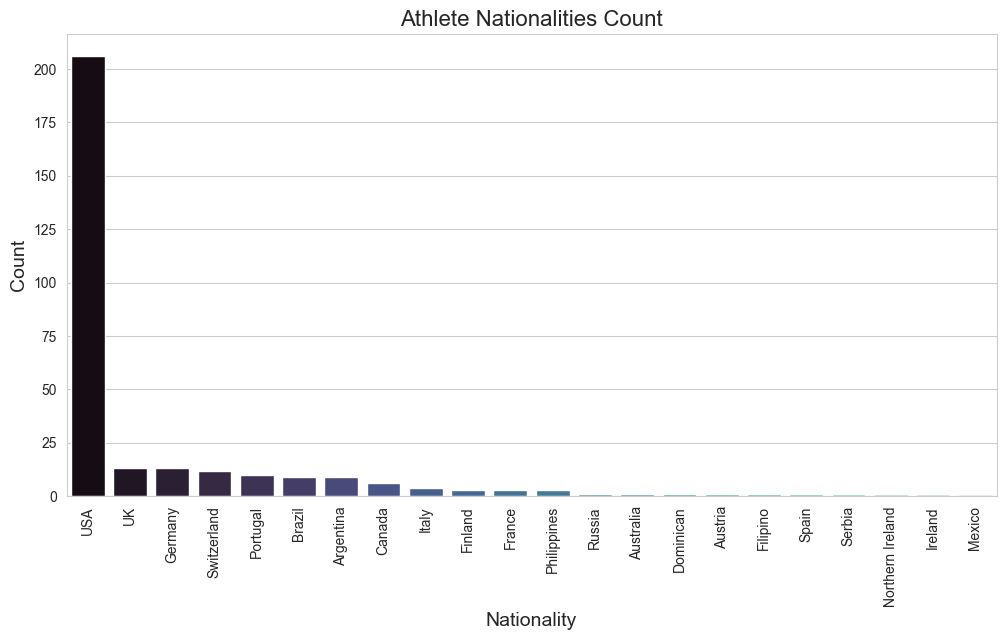

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x=athlete_nationalities.index, y=athlete_nationalities.values, palette="mako")
plt.title("Athlete Nationalities Count", fontsize=16)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.show()

Most of the athletes in the dataset originate from the United States, the United Kingdom and Germany

An exploration into the sports that the athletes in the dataset participate in

In [82]:
athlete_sports = filtered_richest_athlete_df["Sport"].value_counts()
athlete_sports

Sport
Basketball       81
Boxing           46
Golf             44
Soccer           33
Tennis           23
Auto Racing      22
NFL              21
F1               13
Baseball          4
Ice Hockey        4
motorcycle gp     4
baseball          3
Auto racing       1
cycling           1
MMA               1
Name: count, dtype: int64

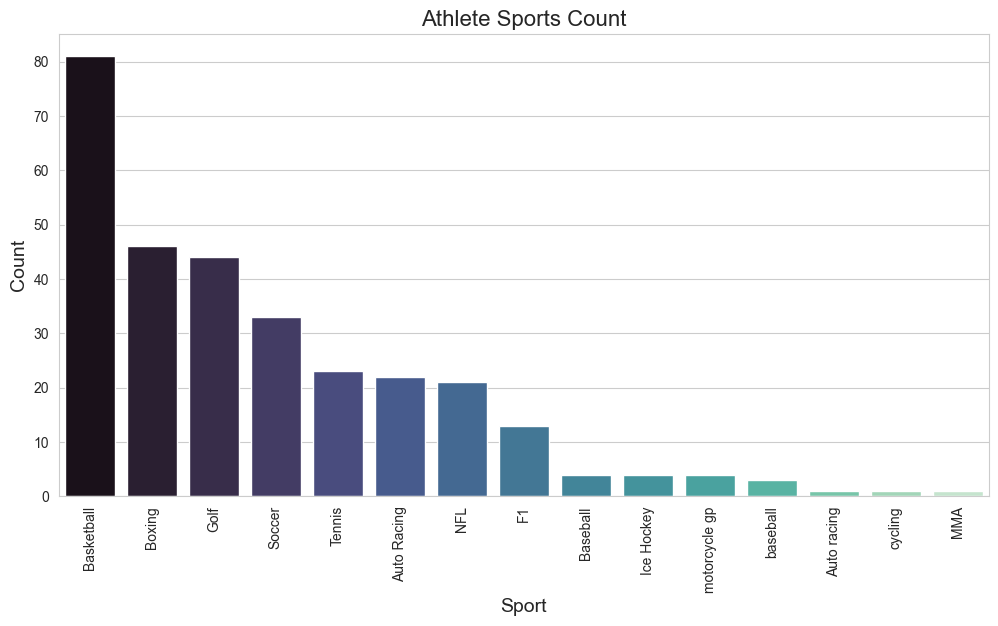

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x=athlete_sports.index, y=athlete_sports.values, palette="mako")
plt.title("Athlete Sports Count", fontsize=16)
plt.xlabel("Sport", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.show()

The most popular sports in the dataset are: basketball, boxing and Golf

Explore the earnings 

An exploration into the average earnings in the dataset.

In [84]:
mean_earnings = filtered_richest_athlete_df["earnings ($ million)"].mean()
print("The average earning in the dataset is: ")
mean_earnings

The average earning in the dataset is: 


45.51627906976744

In [85]:
mean_earnings_year = filtered_richest_athlete_df.groupby("Year")["earnings ($ million)"].mean()
sorted_mean_earnings_year = mean_earnings_year.sort_values(ascending=False)
sorted_mean_earnings_year.head(5)

Year
2018    105.94
2015     95.03
2019     94.14
2020     81.92
2014     64.24
Name: earnings ($ million), dtype: float64

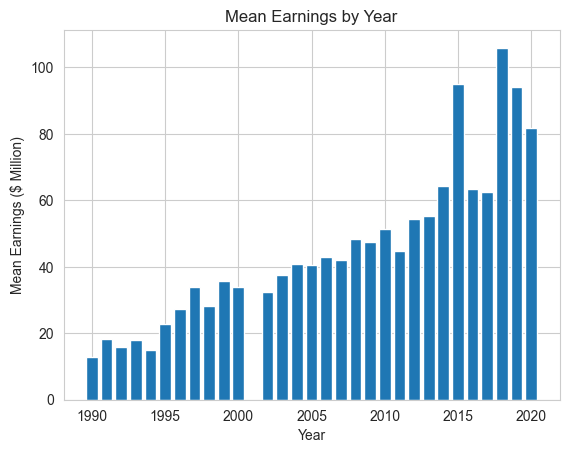

In [86]:
# Create a bar chart to visualize the mean_earnings_year data
plt.bar(mean_earnings_year.index, mean_earnings_year.values)

# Set the chart title and axis labels
plt.title('Mean Earnings by Year')
plt.xlabel('Year')
plt.ylabel('Mean Earnings ($ Million)')

# Show the chart
plt.show()

The top 3 highest average earning were in 2018, 2015 and 2019

In [99]:
max_earnings_year = filtered_richest_athlete_df.groupby("Year")["earnings ($ million)"].max()
sorted_max_earnings_year = max_earnings_year.sort_values(ascending=False)
sorted_max_earnings_year.head(5)

Year
2015    300.0
2018    285.0
2019    127.0
2008    115.0
2009    110.0
Name: earnings ($ million), dtype: float64

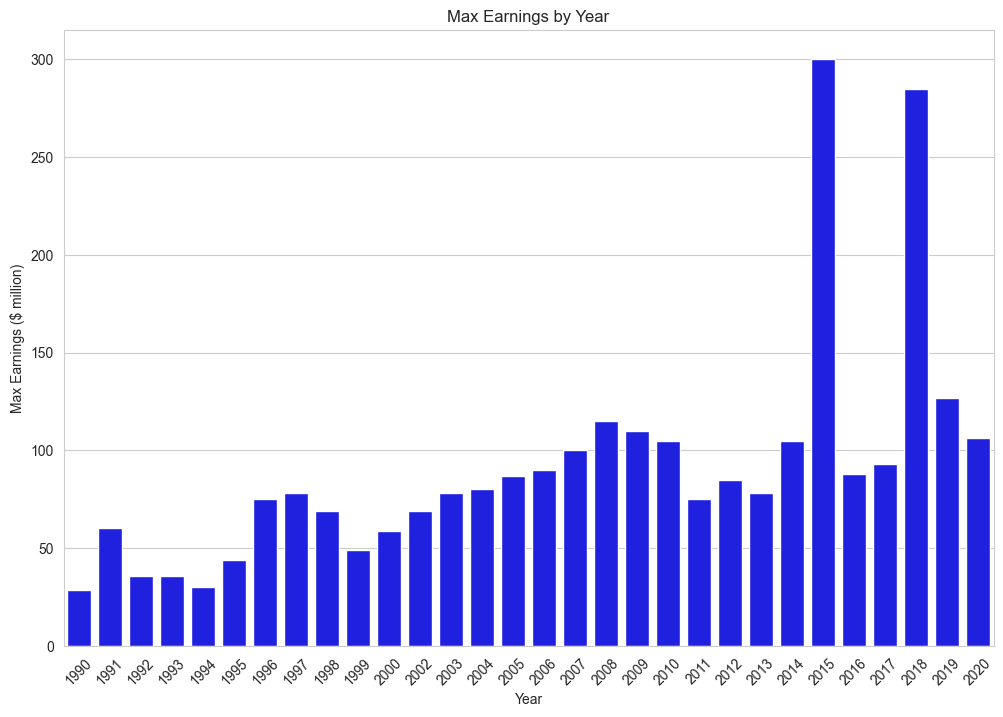

In [88]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_max_earnings_year.index, y=sorted_max_earnings_year, color='blue')

# Set the plot title and axis labels
plt.title('Max Earnings by Year')
plt.xlabel('Year')
plt.ylabel('Max Earnings ($ million)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

The highest earning was achieved in 2015 and it was $300mil

In [89]:
mean_earnings_sport = filtered_richest_athlete_df.groupby("Sport")["earnings ($ million)"].mean()
sorted_mean_earnings_sport = mean_earnings_sport.sort_values(ascending=False)
sorted_mean_earnings_sport.head(5)

Sport
MMA       99.000000
Soccer    67.378788
Boxing    49.973913
F1        49.615385
Golf      48.556818
Name: earnings ($ million), dtype: float64

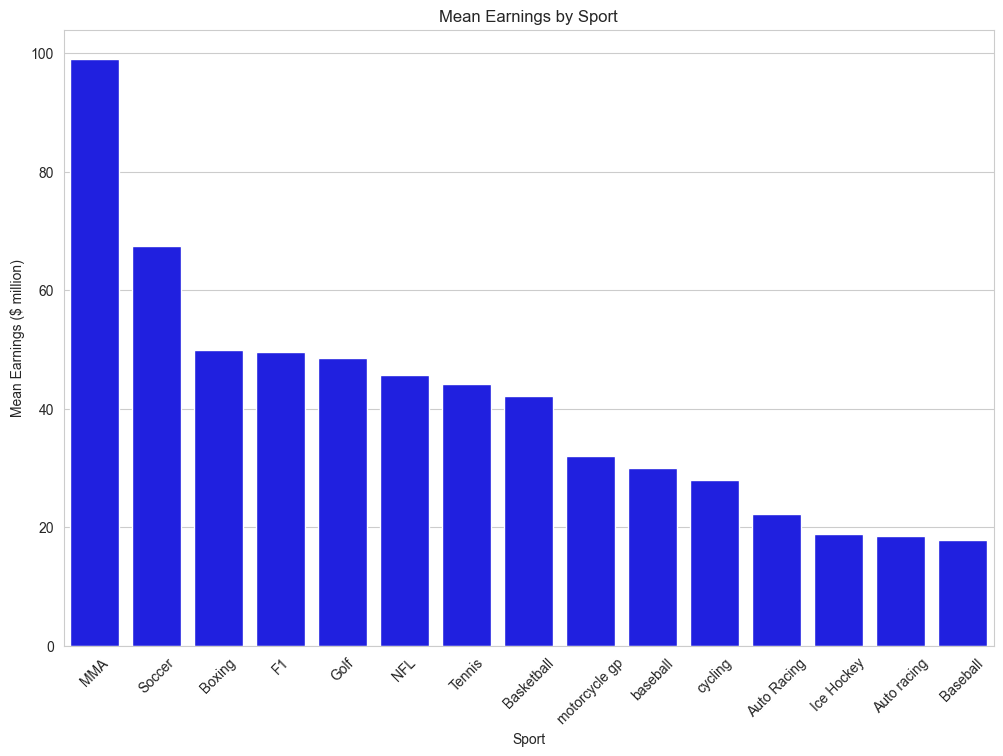

In [90]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_mean_earnings_sport.index, y=sorted_mean_earnings_sport, color='blue')

# Set the plot title and axis labels
plt.title('Mean Earnings by Sport')
plt.xlabel('Sport')
plt.ylabel('Mean Earnings ($ million)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

On average, the top 3 highest earning sports are MMA, Soccer and Boxing.

In [91]:
max_earnings_sport = filtered_richest_athlete_df.groupby("Sport")["earnings ($ million)"].max()
sorted_max_earnings_sport = max_earnings_sport.sort_values(ascending=False)
sorted_max_earnings_sport.head(5)

Sport
Boxing    300.0
Soccer    127.0
Golf      115.0
Tennis    106.3
MMA        99.0
Name: earnings ($ million), dtype: float64

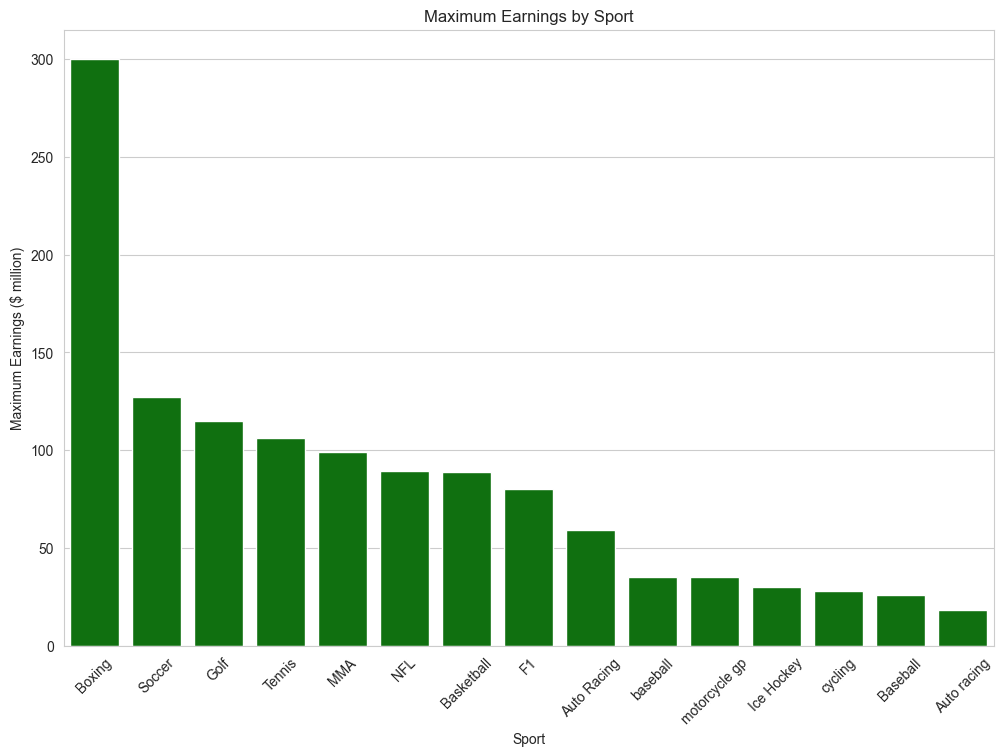

In [92]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_max_earnings_sport.index, y=sorted_max_earnings_sport, color='green')

# Set the plot title and axis labels
plt.title('Maximum Earnings by Sport')
plt.xlabel('Sport')
plt.ylabel('Maximum Earnings ($ million)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

The athlete that earned the most earnings in this dataset is a boxing athlete.

In [94]:
mean_nationality_earnings = filtered_richest_athlete_df.groupby("Nationality")["earnings ($ million)"].mean()
sorted_mean_nationality_earnings = mean_nationality_earnings.sort_values(ascending=False)
sorted_mean_nationality_earnings.head(5)

Nationality
Ireland        99.000000
Mexico         94.000000
Philippines    80.666667
Argentina      79.500000
Portugal       78.710000
Name: earnings ($ million), dtype: float64

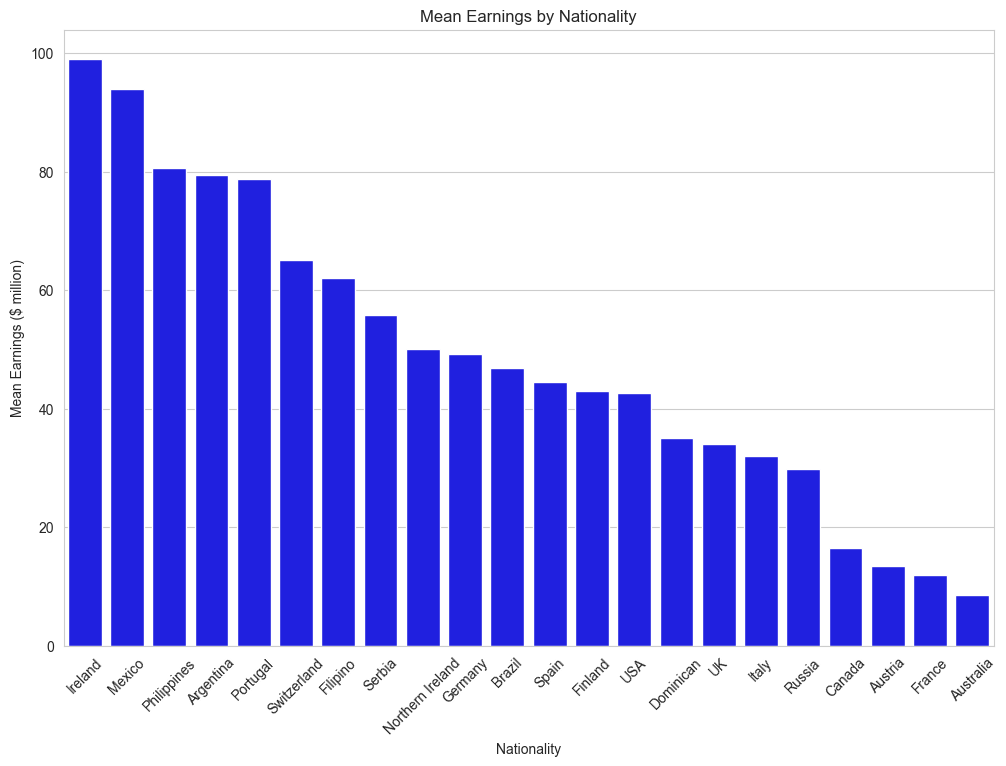

In [95]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_mean_nationality_earnings.index, y=sorted_mean_nationality_earnings, color='blue')

# Set the plot title and axis labels
plt.title('Mean Earnings by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Mean Earnings ($ million)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

On average, the highest earning athletes originate from Ireland, Mexico and Phillipines

In [96]:
max_nationality_earnings = filtered_richest_athlete_df.groupby("Nationality")["earnings ($ million)"].max()
sorted_max_nationality_earnings = max_nationality_earnings.sort_values(ascending=False)
sorted_max_nationality_earnings

Nationality
USA                 300.0
Philippines         160.0
Argentina           127.0
Portugal            109.0
Switzerland         106.3
Brazil              105.0
Ireland              99.0
Mexico               94.0
Germany              80.0
Filipino             62.0
Serbia               55.8
Northern Ireland     50.0
UK                   50.0
Finland              45.0
Spain                44.5
Dominican            35.0
Italy                35.0
Russia               29.8
Canada               23.0
France               16.0
Austria              13.5
Australia             8.5
Name: earnings ($ million), dtype: float64

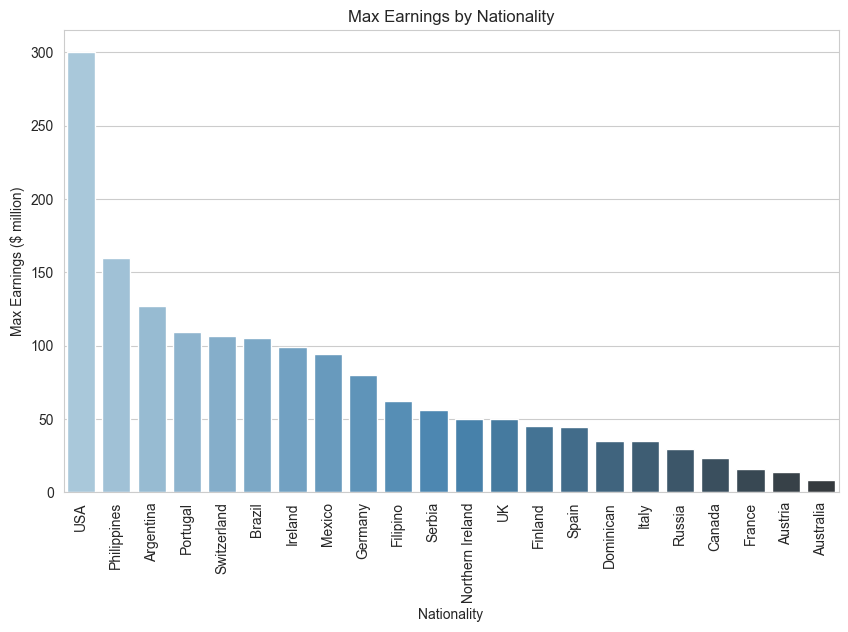

In [97]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_max_nationality_earnings.index, y=sorted_max_nationality_earnings.values, palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Max Earnings ($ million)")
plt.title("Max Earnings by Nationality")
plt.show()

The athlete that received the most earnings in this dataset originates from the United States